# Assignment 10 Linear Regression

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from   scipy   import   stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import metrics

In this assignment, you will multivariate linear regression to explore a small subset of The ClevelandHeart.
+ Data from the UCI Machine Learning Data Repository. Data were collected by the Cleveland Clinic Foundation. Data are deidentified and publicly available. 

The variables you will explore are:
   + age :  age in years
   + trestbps: resting blood pressure in mm Hg on admission to the hospital
   + chol: serum cholesterol in mg/dl

### Research Question
+  Is there a significant linear relationship between resting blood pressure (y)
and the linear combination of age (x) and serum cholesterol (x)?

# Data Set

In [2]:
df = pd.read_csv('lmdata.csv')
df.head()

,age,trestbps,chol
0,63,145,233
1,37,130,250
2,41,130,204
3,56,120,236
4,57,120,354


In [3]:
# describe the data
df.describe()

,age,trestbps,chol
count,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026
std,9.082101,17.538143,51.830751
min,29.000000,94.000000,126.000000
25%,47.500000,120.000000,211.000000
50%,55.000000,130.000000,240.000000
75%,61.000000,140.000000,274.500000
max,77.000000,200.000000,564.000000


<AxesSubplot:>

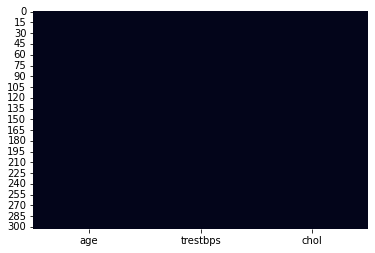

In [5]:
# check for missing data 
# using seaborn heatmap to check for missing data
sns.heatmap(df.isnull(), cbar=False)


In [6]:
# Select the feature & target, and save in variables
features = df[['age','chol']]
target = df.trestbps

# display the features head
features.head()

,age,chol
0,63,233
1,37,250
2,41,204
3,56,236
4,57,354


In [7]:
# check features relationship? Save result in a variable called corrmat
corrmat = features.corr()
corrmat

,age,chol
age,1.000000,0.213678
chol,0.213678,1.000000


<AxesSubplot:>

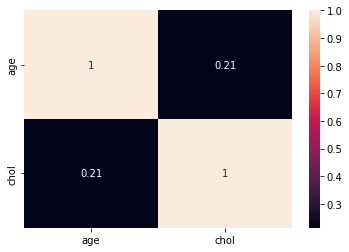

In [8]:
# plot a Seaborn heatmap of the corrmat (your correlation matrix variable)
sns.heatmap(corrmat.abs(),annot=True)

<AxesSubplot:xlabel='age', ylabel='trestbps'>

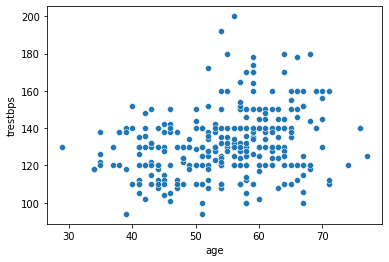

In [9]:
# check linear age and resting bp with a scatterplot?
sns.scatterplot(x="age",y="trestbps",data=df)
plt.show()

<AxesSubplot:xlabel='chol', ylabel='trestbps'>

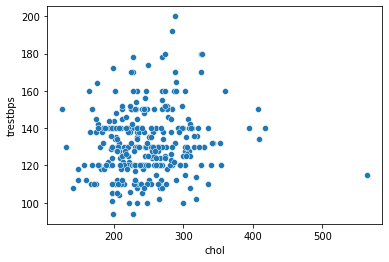

In [10]:
# check linear cholesterol level and resting bp with a scatterplot?
sns.scatterplot(x="chol",y="trestbps",data=df)
plt.show()

[Text(0.5, 1.0, 'Age box plot'), Text(0.5, 0, 'age')]

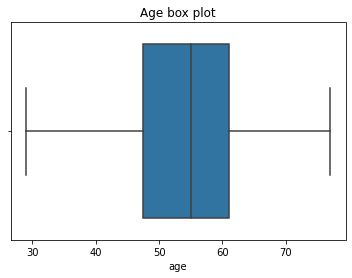

In [13]:
# Seaborn boxplot of age
ax = sns.boxplot(x='age', data=df)
ax.set(title='Age box plot',xlabel='age')

[Text(0.5, 1.0, 'cholestrol level box plot'), Text(0.5, 0, 'chol')]

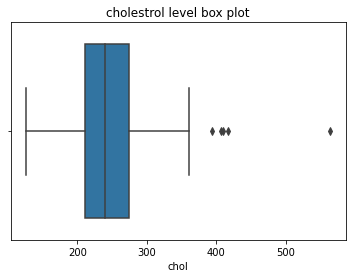

In [14]:
# Seaborn boxplot of cholesterol level
ax = sns.boxplot(x='chol',data=df)
ax.set(title='cholestrol level box plot',xlabel='chol')

In [34]:
#  Conduct a Linear Regression of the features and the target
#  Remember is it ols(y ~ x + x ...)
model = ols("trestbps ~ age+chol", df).fit()

# print a summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               trestbps   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     13.44
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           2.56e-06
Time:                        01:13:07   Log-Likelihood:                -1284.3
No. Observations:                 303   AIC:                             2575.
Df Residuals:                     300   BIC:                             2586.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     98.2453      6.822     14.401      0.0

In [35]:
# Is the model significant? Justify your answer
# Analysis:Prob (F-statistic) =  2.56e-06 < alpha - 0.05; so the model is significant

In [36]:
# Is the relationship between x & y significant? We will analyze 
# the slope of regression line to determine this.
# Given b1 = the slope of the regression line
# H0: b1 = 0 (i.e. x coefficients are all zero)
# H1: b1 ≠ 0 (i.e. the x coefficients are not equal to zero)

# Your Analysis: 
# the  P > |t| means the probability that β1 = 0.
# smaller p values indicate stronger relationships between y and x

model.pvalues

# age and cholestrol level p value < alpha, which gives evidence that the slope of the regression line is not zero.

Intercept    4.196320e-36
age          4.289760e-06
chol         2.409601e-01
dtype: float64

In [37]:
# check mean of model residuals near zero
np.mean(model.resid)

7.71044394448584e-14

In [38]:
# write the regression model using your results
# generic: y = b0 + b1*x 
# Our model: resting blood pressure  =  98.2453 + 0.5120 * chol

In [42]:
# How good is the prediction?
# RMSE: root mean squared
ypred = model.predict()
yactual = target

rmse = np.sqrt( metrics.mean_squared_error( yactual , ypred ))
print('RMSE =', rmse)
# check rmse against range of data
myrange = np.max(target) - np.min(target)
print('range of resting blood pressure = ',round(myrange,2))


RMSE = 16.77357471937009
range of resting blood pressure =  106


In [43]:
# What percent of the variation in y is determined by the x value?
# Adjusted rsquared 0.082, indicating that 8% of the variation in y is explained by x